APPENDIX A: Preprocessing and EDA of EmoBank dataset

In [1]:
import pandas as pd


data_01=pd.read_csv('EmoBank.csv')

print(data_01.columns)
print('')
print(data_01.shape)
print(data_01.head())
print('')
print(data_01.dtypes)
#print(data_01['Emotion'].nunique())

Index(['id', 'split', 'V', 'A', 'D', 'text'], dtype='object')

(10062, 6)
                    id  split     V     A     D  \
0  110CYL068_1036_1079  train  3.00  3.00  3.20   
1  110CYL068_1079_1110   test  2.80  3.10  2.80   
2  110CYL068_1127_1130  train  3.00  3.00  3.00   
3  110CYL068_1137_1188  train  3.44  3.00  3.22   
4  110CYL068_1189_1328  train  3.55  3.27  3.46   

                                                text  
0        Remember what she said in my last letter? "  
1                          If I wasn't working here.  
2                                                .."  
3  Goodwill helps people get off of public assist...  
4  Sherry learned through our Future Works class ...  

id        object
split     object
V        float64
A        float64
D        float64
text      object
dtype: object


In [2]:
data_01['split'].value_counts()

train    8062
test     1000
dev      1000
Name: split, dtype: int64

In [3]:
data_01.head()

,id,split,V,A,D,text
0,110CYL068_1036_1079,train,3.00,3.00,3.20,"Remember what she said in my last letter? """
1,110CYL068_1079_1110,test,2.80,3.10,2.80,If I wasn't working here.
2,110CYL068_1127_1130,train,3.00,3.00,3.00,".."""
3,110CYL068_1137_1188,train,3.44,3.00,3.22,Goodwill helps people get off of public assist...
4,110CYL068_1189_1328,train,3.55,3.27,3.46,Sherry learned through our Future Works class ...


In [4]:
data_01.isnull().sum()

id       0
split    0
V        0
A        0
D        0
text     0
dtype: int64

In [5]:
num_duplicates_subset = data_01.duplicated(subset=['text']).sum()
print("\nNumber of duplicates based on 'text' column:", num_duplicates_subset)



Number of duplicates based on 'text' column: 156


In [6]:
#Remove duplicates
data_01=data_01.drop_duplicates(subset=['text'])
data_01.shape

(9906, 6)

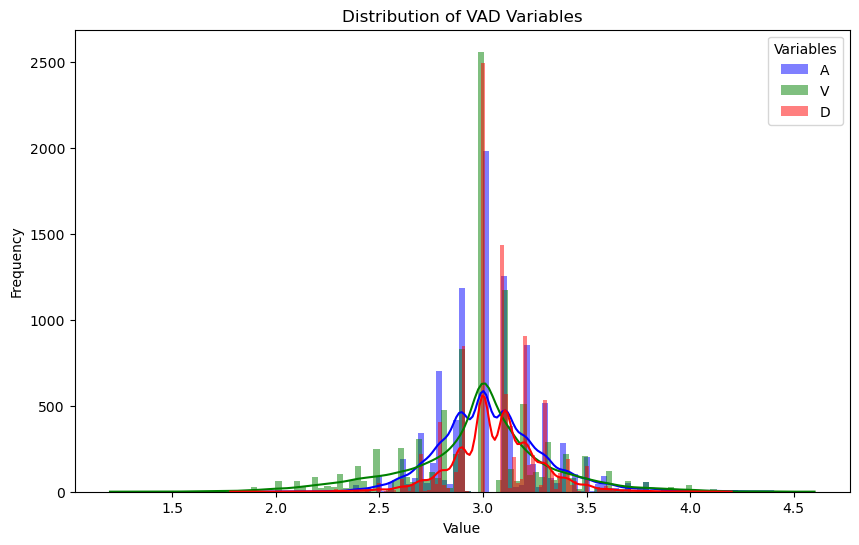

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.histplot(data_01['A'], color='blue', label='A', kde=True, edgecolor=None)
sns.histplot(data_01['V'], color='green', label='V', kde=True, edgecolor=None)  
sns.histplot(data_01['D'], color="red", label='D', kde=True, edgecolor=None)   

plt.title('Distribution of VAD Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Variables')

# Show the plot
plt.show()

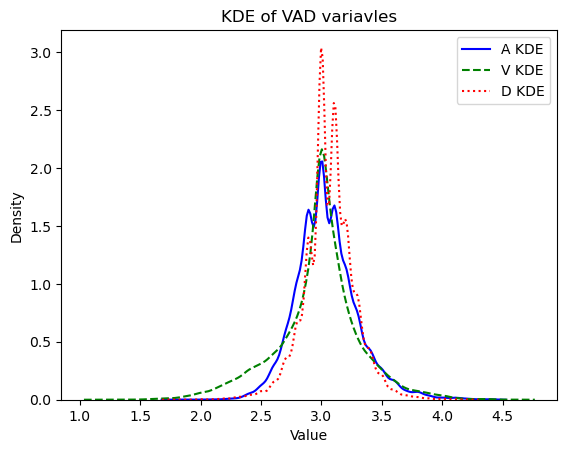

In [8]:
sns.kdeplot(data_01['A'], color='blue', linestyle='-', label='A KDE')
sns.kdeplot(data_01['V'], color='green', linestyle='--', label='V KDE')
sns.kdeplot(data_01['D'], color='red', linestyle=':', label='D KDE') 

plt.title('KDE of VAD variavles')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Correlation Matrix:
          A         V         D
A  1.000000  0.040116  0.203219
V  0.040116  1.000000  0.384675
D  0.203219  0.384675  1.000000


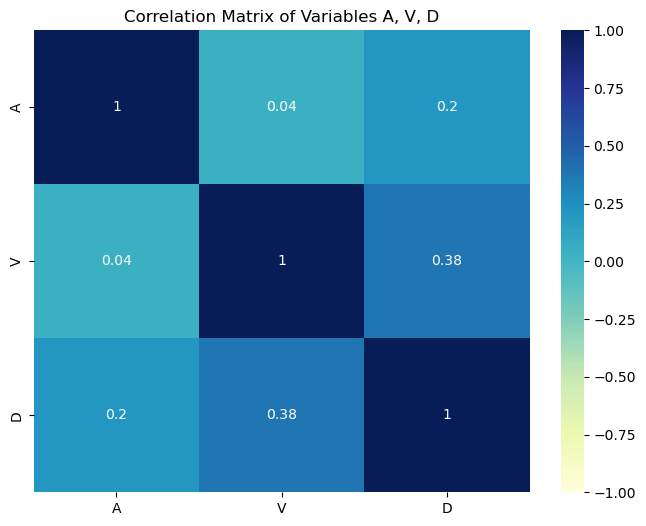

In [9]:
# Correlation Matrix of VAD variables
correlation_matrix = data_01[['A', 'V', 'D']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables A, V, D')
plt.show()

In [10]:
#Desciptive statistics for VAD variables
from tabulate import tabulate
descriptive_stats = data_01[['A', 'V', 'D']].describe()


print("Descriptive Statistics of VAD variables:")

descriptive_stats.style.set_table_styles(
    [{'selector': 'th',
      'props': [('font-size', '12pt'), 
                ('background-color', '#f7f7f9'), 
                ('color', '#333333'), 
                ('border', '1px solid #dddddd')]},
     {'selector': 'td',
      'props': [('font-size', '12pt')]}]
)

Descriptive Statistics of VAD variables:


,A,V,D
count,9906.000000,9906.000000,9906.000000
mean,3.042885,2.975646,3.063360
std,0.259037,0.348983,0.209702
min,1.800000,1.200000,1.780000
25%,2.890000,2.800000,3.000000
50%,3.000000,3.000000,3.100000
75%,3.200000,3.120000,3.200000
max,4.400000,4.600000,4.200000


"Text" column descriptives

In [11]:
#Lengths (number of characters) of text column

lengths = data_01['text'].apply(len)
max_length = data_01['text'].apply(len).max()
min_length = data_01['text'].apply(len).min()
mean_length = round(data_01['text'].apply(len).mean())


print(f"The maximum length of 'text' is: {max_length}")
print(f"The minimum length of 'text' is: {min_length}")
print(f"The mean length of 'text' is: {mean_length}")
print(f"Most frequent 'text' length is: {lengths.value_counts().idxmax()}")

The maximum length of 'text' is: 674
The minimum length of 'text' is: 1
The mean length of 'text' is: 89
Most frequent 'text' length is: 34


In [12]:
length_counts = lengths.value_counts()

print("Text lengths and their occurrences:")
print(length_counts)

Text lengths and their occurrences:
34     166
33     155
32     133
42     120
31     117
      ... 
374      1
283      1
324      1
329      1
391      1
Name: text, Length: 374, dtype: int64


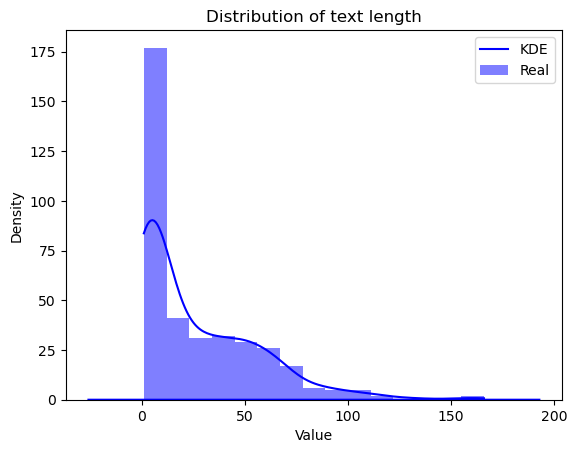

In [13]:
#Distribution of text length
sns.histplot(length_counts, color='blue',label='Real', kde=True, edgecolor=None)
sns.kdeplot(length_counts, color='blue', label='KDE')  

plt.title('Distribution of text length')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
#Word frequency
import re
from collections import Counter

#join all text data
all_text = ' '.join(data_01['text'])

# Extract words and count frequencies
words = re.findall(r'\b\w+\b', all_text.lower())
word_freq = Counter(words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
print(word_freq_df)

         Word  Frequency
33        the       8257
19         of       4081
37        and       4056
42         to       4046
72          a       3577
...       ...        ...
9907     enzo          1
9906   ghetto          1
9905    favrd          1
9904     digg          1
15962   edens          1

[15963 rows x 2 columns]


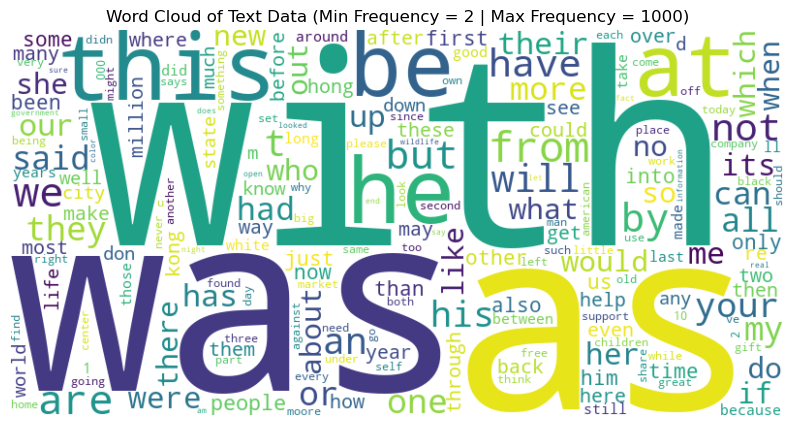

In [15]:
from wordcloud import WordCloud

# Define minimum and maximum frequency thresholds
min_freq = 2
max_freq = 1000

# Filter word frequencies based on thresholds
filtered_word_freq = {word: freq for word, freq in word_freq.items() if min_freq <= freq <= max_freq}

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data (Min Frequency = {} | Max Frequency = {})'.format(min_freq, max_freq))
plt.show()

In [16]:
#Reality check of the dataset
for i in ["V", "A", "D"]:
    min_index = data_01[i].idxmin()
    max_index = data_01[i].idxmax()
    
    print("Min {}:".format(i))
    print(data_01.loc[min_index])
    print()
    
    print("Max {}:".format(i))
    print(data_01.loc[max_index])
    print()

Min V:
id       A_defense_of_Michael_Moore_12034_12044
split                                     train
V                                           1.2
A                                           4.2
D                                           3.8
text                                 "Fuck you"
Name: 1146, dtype: object

Max V:
id                 vampires_4446_4474
split                           train
V                                 4.6
A                                 4.3
D                                 3.7
text     lol Wonderful Simply Superb!
Name: 9595, dtype: object

Min A:
id                       Nathans_Bylichka_2070_2112
split                                         train
V                                               3.1
A                                               1.8
D                                               3.1
text     I was feeling calm and private that night.
Name: 3535, dtype: object

Max A:
id       captured_moments_28728_28752
split                    

In [19]:
data_01.isnull().sum()

id       0
split    0
V        0
A        0
D        0
text     0
dtype: int64

In [20]:
data_01.to_csv('Emo_Bank_VAD.csv', index=False)